_Cleaning Preparation_
To begin the cleaning process, we will import the pandas and NumPy libraries and read in the .csv data file.

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
autos = pd.read_csv('autos.csv',encoding = 'ISO-8859-1')
autos.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [2]:
autos.shape

(371528, 20)

Error :-'utf-8' codec can't decode byte 0xdc in position 14: invalid continuation byte
we got the above error,  the data set seems to be encoded in a codec other than the typical utf-8.
so we tried multiple encoding's and ISO-8859-1 seems to be working.

Exploring the data 

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

Observations:
A few key observations about the data in its current form:
The rows are indexed by integer, there are no str headers to remove.
Category titles are written in camelcase rather than the preferred snakecase, and some can be shortened easily.
The 'dateCrawled, dateCreated, and lastSeen categories contains date and time information, but are listed as object types rather than datetime.
The 'name' category does not have much standardization, including make, model and options listed in a long str format.
<!-- The 'price' category is listed as containing object data rather than float values which would be more useful. -->
<!-- The 'kilometer' category needs to be converted to an 'int type. -->
There are null values in the vehicleType, gearbox, model, fuelType, and notRepairedDamage categories.
Null values do not make up more than ~20% of any particular category.

In [4]:
autos.describe(include = 'all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [5]:
autos.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

Data Cleaning

Step One: Formatting Columns
To begin, I will reformat the existing column headers to make for easier analysis.

In [6]:
# Cleaninglean column headers
column_dict = {'dateCrawled': 'date_crawled','offerType':'offer_type',
 'vehicleType':'vehicle_type', 'yearOfRegistration': 'registration_year',
 'powerPS': 'power_ps', 'monthOfRegistration':'registration_month',
 'fuelType':'fuel_type', 'notRepairedDamage': 'unrepaired_damage',
 'dateCreated':'ad_created', 'nrOfPictures':'nr_of_pictures', 
 'postalCode':'postal_code', 'lastSeen':'last_seen'}
autos = autos.rename(columns=column_dict)
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


date crawled, datecreated,last seen datetime objects.
create a new dataframes.

nan, spaces values fill with mode and median and mean.

price and kilometers, year of registartion outliers.

plot corelation.
variance 
visulaisation


data_cralwed 


In [7]:
autos["date_crawled"]= pd.to_datetime(autos["date_crawled"]).dt.date
autos["ad_created"]= pd.to_datetime(autos["ad_created"]).dt.date
autos["last_seen"]= pd.to_datetime(autos["last_seen"]).dt.date


In [8]:
autos.head(10)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-24,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05
3,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06
5,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06
6,2016-04-01,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05
7,2016-03-21,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25
8,2016-04-04,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04,0,94505,2016-04-04
9,2016-03-17,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31


price and kilometers, year of  registration outliers.

not converting price since it is already in int

In [9]:
autos = autos.drop(['date_crawled', 'ad_created', 'last_seen'], 1)

In [10]:
autos = autos.drop('name', 1)

In [11]:
autos['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [12]:
autos = autos[autos.seller != 'gewerblich']
autos = autos.drop('seller',1)

In [13]:
autos['offer_type'].value_counts()

Angebot    371513
Gesuch         12
Name: offer_type, dtype: int64

In [13]:
autos=autos[autos.offer_type != 'Gesuch']
autos = autos.drop('offer_type',1)

In [14]:
autos['abtest'].value_counts()
autos = autos.drop('abtest',1)

<AxesSubplot:>

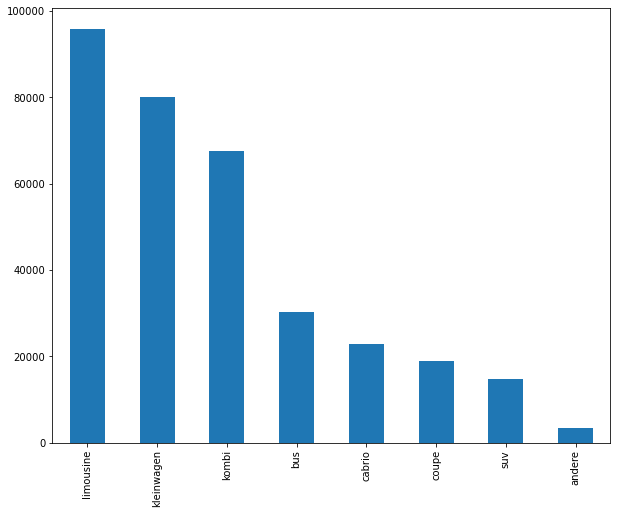

In [15]:
autos.vehicle_type.value_counts().plot(kind='bar',figsize=(10,8))

In [16]:
autos["vehicle_type"].value_counts()

limousine     95893
kleinwagen    80022
kombi         67563
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicle_type, dtype: int64

In [17]:
autos = autos[autos.vehicle_type != 'andere']

In [18]:
autos["gearbox"].value_counts()

manuell      271462
automatik     76743
Name: gearbox, dtype: int64

In [19]:
autos['model'].value_counts()

golf               29878
andere             25658
3er                20369
polo               13069
corsa              12555
                   ...  
rangerover             5
serie_2                5
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

<AxesSubplot:>

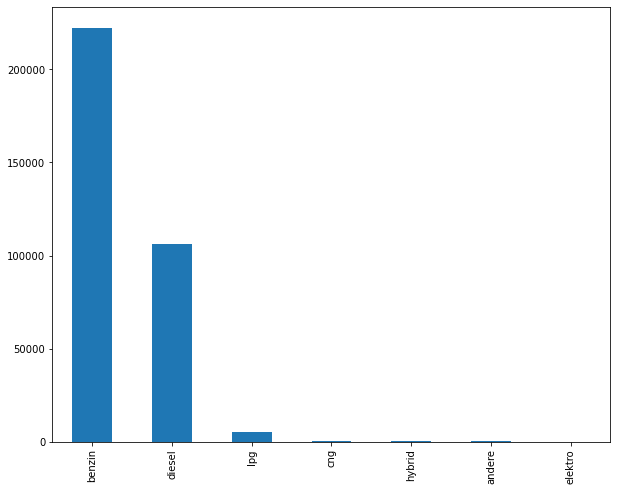

In [20]:
autos.fuel_type.value_counts().plot(kind='bar',figsize=(10,8))

In [21]:
autos['fuel_type'].value_counts()

benzin     222426
diesel     106277
lpg          5348
cng           557
hybrid        276
andere        164
elektro        92
Name: fuel_type, dtype: int64

In [22]:
autos = autos[autos.fuel_type != 'andere']

<AxesSubplot:>

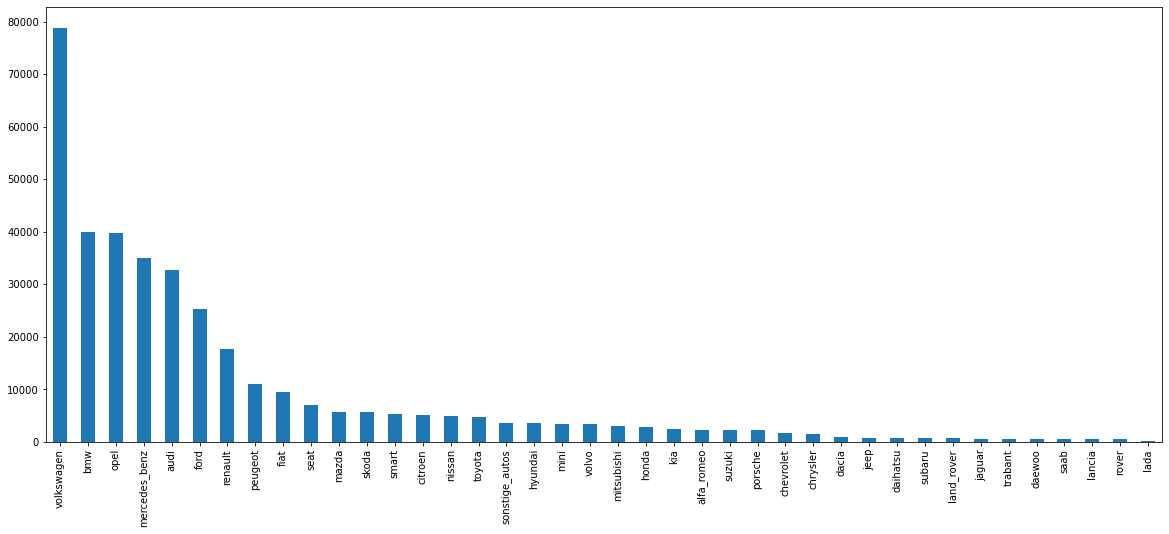

In [23]:
autos.brand.value_counts().plot(kind='bar',figsize=(20,8))

In [24]:
autos["unrepaired_damage"].value_counts()

nein    261406
ja       35785
Name: unrepaired_damage, dtype: int64

In [25]:
autos = autos[autos.unrepaired_damage == 'nein']
autos = autos.drop('unrepaired_damage',1)

In [26]:
autos = autos.drop('nr_of_pictures',1)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'registration_year'}>],
       [<AxesSubplot:title={'center':'power_ps'}>,
        <AxesSubplot:title={'center':'kilometer'}>],
       [<AxesSubplot:title={'center':'registration_month'}>,
        <AxesSubplot:title={'center':'postal_code'}>]], dtype=object)

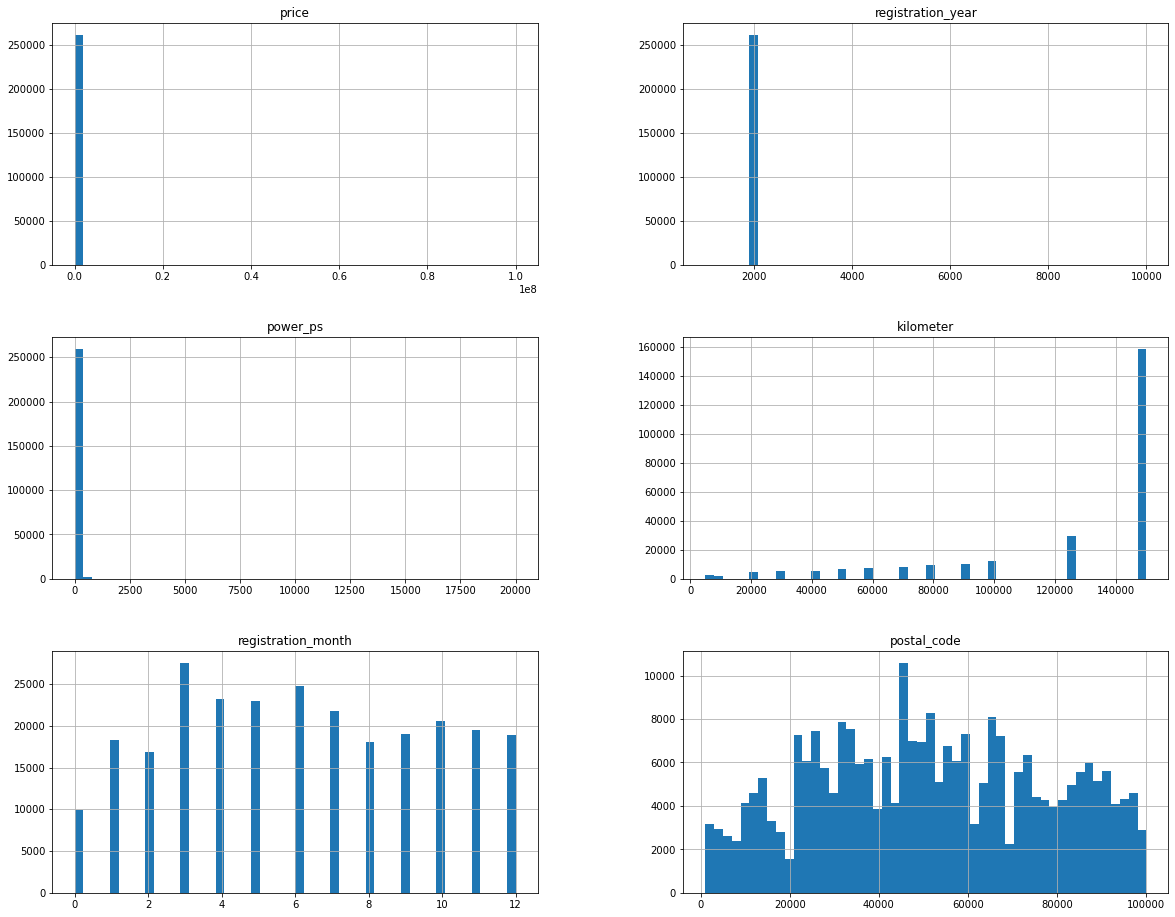

In [27]:
autos.hist(bins=50,figsize=(20,16))

<AxesSubplot:>

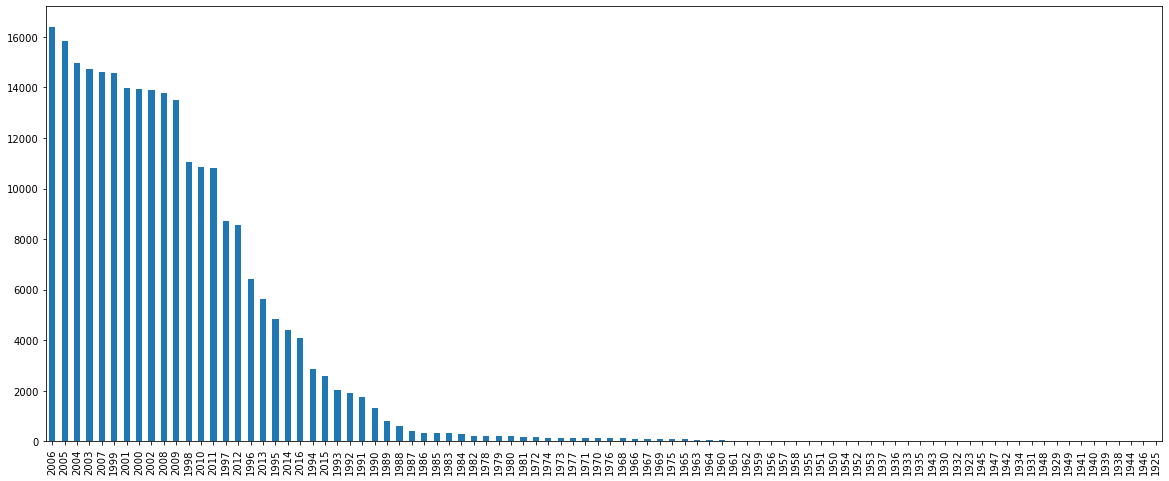

In [29]:
autos= autos[(autos.registration_year >=1916) & (autos.registration_year<=2016)]
autos.registration_year.value_counts().plot(kind='bar',figsize=(20,8))

In [30]:
print(autos['price'].value_counts())

1500      3127
0         3094
2500      2883
3500      2659
1200      2636
          ... 
4675         1
577          1
106997       1
8645         1
36399        1
Name: price, Length: 5224, dtype: int64


Next, I will explore the 'price' category to see if there is any data which needs to be removed or replaced.

In [31]:
autos['price'].unique().shape

(5224,)

In [32]:
autos['price'].describe()

count    2.542230e+05
mean     9.203703e+03
std      4.016633e+05
min      0.000000e+00
25%      1.750000e+03
50%      4.000000e+03
75%      8.999000e+03
max      1.000000e+08
Name: price, dtype: float64

Evidently there are some outliers in this category which need to be removed.

In [33]:
price_count = autos['price'].value_counts()
price_count.sort_index().head(5)

0    3094
1     271
2       4
3       2
5       7
Name: price, dtype: int64

Evidently, there are values in this category with an abnormally low amount (including 1,421 values of 0), and values with an abnormally high amount. The mean price is approximately 9,840 euros. It is fair to assume for our purposes that prices of under 500 or above 100,000 euros will not be helpful for this analysis. Thus, we need to remove all values that fall outside of these parameters.

In [34]:
autos= autos[(autos.price >= 600) & (autos.price <=60000)]
autos['price'].value_counts()

1500     3127
2500     2883
3500     2659
1200     2636
1000     2295
         ... 
9540        1
7491        1
3393        1
1344        1
36399       1
Name: price, Length: 4542, dtype: int64

In [35]:
autos['power_ps'].value_counts()

75       13955
150      10974
0        10705
140      10674
116       8758
         ...  
20000        1
5867         1
950          1
407          1
332          1
Name: power_ps, Length: 608, dtype: int64

In [36]:
autos= autos[(autos.power_ps >=30) & (autos.power_ps<=500)]

In [37]:
autos['kilometer'].unique().shape

(13,)

In [38]:
autos['kilometer'].describe()

count    228105.000000
mean     122211.678832
std       40488.470592
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

no outlier to be removed from kilometers columns

Analyzing Registration Year

In [39]:
autos['registration_year'].describe()

count    228105.000000
mean       2004.005476
std           6.503357
min        1923.000000
25%        2000.000000
50%        2005.000000
75%        2008.000000
max        2016.000000
Name: registration_year, dtype: float64

This data seems to contain some significant problems. Cars cannot be registerd for a date following the sale of the car, so any value later than the year 2016 is an error. The max value of this column is 9999 which seems like a data input error. In addition, the minimum value of this column is 1000, which is also impossible.
To clean this data, we will need to select a reasonable range for registration years, outside of which all values are removed. For the purpose of this analysis, a car listed as registered prior to the year 1900 seems reasonably likely to be an error. So our range of acceptable dates will be from 1995–2015.

In [40]:
autos= autos[(autos.registration_year >=1995) & (autos.registration_year<=2015)]
now = datetime.datetime.now()
autos['vehicleAge'] = ((now.year * 12 + now.month) - (autos.registration_year * 12 + autos.registration_month))
autos = autos.drop(['registration_year','registration_month'], 1)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'power_ps'}>],
       [<AxesSubplot:title={'center':'kilometer'}>,
        <AxesSubplot:title={'center':'postal_code'}>],
       [<AxesSubplot:title={'center':'vehicleAge'}>, <AxesSubplot:>]],
      dtype=object)

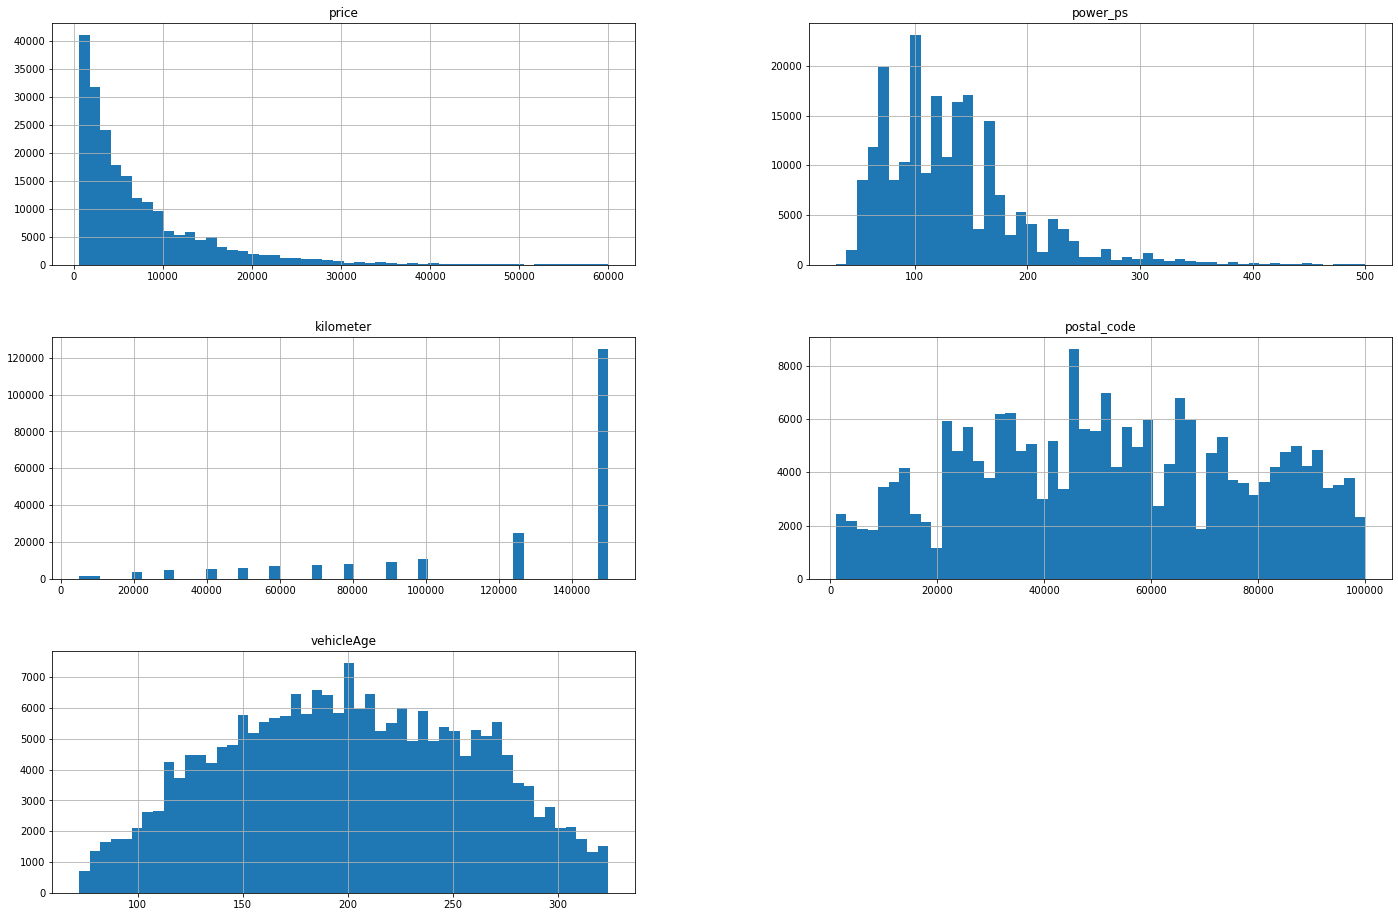

In [41]:
autos.hist(bins=50,figsize=(24,16))

In [42]:
autos.isnull().sum()

offer_type         0
price              0
vehicle_type    1082
gearbox         2051
power_ps           0
model           4433
kilometer          0
fuel_type       4914
brand              0
postal_code        0
vehicleAge         0
dtype: int64

drop nan values

In [43]:
autos = autos.dropna()

In [44]:
autos.isnull().sum()

offer_type      0
price           0
vehicle_type    0
gearbox         0
power_ps        0
model           0
kilometer       0
fuel_type       0
brand           0
postal_code     0
vehicleAge      0
dtype: int64

In [45]:
autos.head()

,offer_type,price,vehicle_type,gearbox,power_ps,model,kilometer,fuel_type,brand,postal_code,vehicleAge
3,Angebot,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,91074,246
4,Angebot,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,60437,161
6,Angebot,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,67112,208
10,Angebot,2000,limousine,manuell,105,3_reihe,150000,benzin,mazda,96224,204
14,Angebot,17999,suv,manuell,190,navara,70000,diesel,nissan,4177,129


In [49]:
autos.to_csv('new_autos_dropped.csv')